<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np

In [3]:
iris=pd.read_csv(r'C:\Users\Tiago McDonald\Documents\GitHub\248_Repo\Labs\module_3\Data-Cleaning-Challenge\iris-data.csv')

In [4]:
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Check the data types
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The first four columns are float, which means that we only have numerical data in those columns, like it's supposed to

In [6]:
# Check for missing values
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [8]:
iris[iris.petal_width_cm.isna()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


So we have 5 missing values in the petal_width_cm column, that belong to only one class: Iris-setosa

In [11]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

Some of the classes have the same meaning but are spelled incorrectly, like **versicolor** and **Iris-setossa**

In [12]:
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [18]:
# Correct the naming of the classes
iris['class']=np.where(iris['class'].str.startswith('versicolor'),'Iris-veriscolor',iris['class'])
iris['class']=np.where(iris['class']=='Iris-setossa','Iris-setosa',iris['class'])

In [30]:
# Identify the different number of widths for the class Iris setosa
iris[iris['class']=='Iris-setosa'].petal_width_cm.value_counts()

0.2    24
0.4     7
0.3     7
0.1     5
0.6     1
0.5     1
Name: petal_width_cm, dtype: int64

In [31]:
iris[(iris['class']=='Iris-setosa') & (iris.petal_width_cm == 0.2)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
25,5.0,3.0,1.6,0.2,Iris-setosa


So we identified the different widths in the class Iris-setosa and it appears to be an ordinal variable. The most frequent width is 0.2 cm. For this width and this class, the petal length, as well as the sepal width and length, vary a lot and there doesn't appear to exist a pattern.

Since there is no obvious pattern or rule for the petal width. and since it's an ordinal variable, we will **use the mode to fill the missing values with the most frequent value: 0.2**

In [54]:
mode = iris[(iris['class']=='Iris-setosa')].petal_width_cm.mode()

iris.fillna(mode[0], inplace=True)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [57]:
iris.iloc[7]

sepal_length_cm              5
sepal_width_cm             3.4
petal_length_cm            1.5
petal_width_cm             0.2
class              Iris-setosa
Name: 7, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B79AF37608>,
      dtype=object)

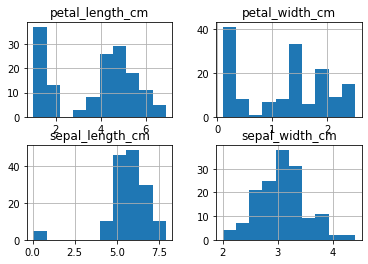

In [60]:
iris.hist()

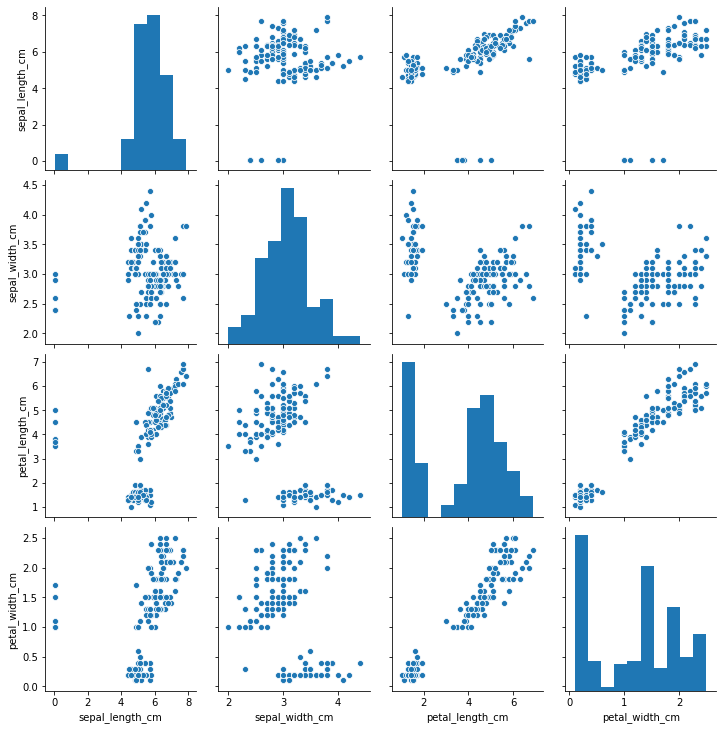

In [62]:
import seaborn as sns
sns.pairplot(iris)